# KDE probability modelling

In [1]:
## Importing required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Linear Regression Library
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Importing naive bayes library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Importing pre_processing data library
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

# Importing ignoring wornings library
import warnings
warnings.filterwarnings("ignore")

## Reading files obtained from offical NSW transport

In [3]:
pc_time_loc_NOV = pd.read_csv("files/pc_time-loc_16NOV.csv")
pc_time_loc_MAR = pd.read_csv("files/pc_time-loc_23MAR.csv")
pc_time_loc_AUG = pd.read_csv("files/pc_time-loc_24AUG.csv")
pc_time_loc_FEB = pd.read_csv("files/pc_time-loc_24FEB.csv")
pc_time_loc_NOV.head()

,Unnamed: 0,mode,date,tap,time,loc,count
0,0,bus,20201116,off,0:15,2000,19
1,1,bus,20201116,off,0:45,2000,21
2,2,bus,20201116,off,2:15,2007,19
3,3,bus,20201116,off,3:15,2000,22
4,4,bus,20201116,off,4:00,2140,19


### To complete the estimation portion of the assignment, the optimal times to place an individual inside a station will be found using the time-location data.

To recude computation time, this process is completed just for train times in the Sydney CBD

In [19]:
pc_time_loc_NOV.head()

,Unnamed: 0,mode,date,tap,time,loc,count
0,0,bus,20201116,off,0:15,2000,19
1,1,bus,20201116,off,0:45,2000,21
2,2,bus,20201116,off,2:15,2007,19
3,3,bus,20201116,off,3:15,2000,22
4,4,bus,20201116,off,4:00,2140,19


In [20]:
NOV_train = pc_time_loc_NOV[(pc_time_loc_NOV['mode']=='train') & (pc_time_loc_NOV['loc']==2000)]
FEB_train = pc_time_loc_FEB[(pc_time_loc_FEB['mode']=='train') & (pc_time_loc_FEB['loc']==2000)]
MAR_train = pc_time_loc_MAR[(pc_time_loc_MAR['mode']=='train') & (pc_time_loc_MAR['loc']==2000)]
AUG_train = pc_time_loc_AUG[(pc_time_loc_AUG['mode']=='train') & (pc_time_loc_AUG['loc']==2000)]

Next, a percentage column is generated for number of tap ons and offs, though they are not specifically needed here in this section

In [21]:
NOV_train['%'] = NOV_train['count']/sum(NOV_train['count'])
FEB_train['%'] = FEB_train['count']/sum(FEB_train['count'])
MAR_train['%'] = MAR_train['count']/sum(MAR_train['count'])
AUG_train['%'] = AUG_train['count']/sum(AUG_train['count'])

A small dictionary is made to contain the days of the week in number form and a list of all the possible times is also generated, then the function below prints the percentages of each of the days of the week (Monday through Friday) in a graph to analyse the distribution.

In [22]:
numtoday = dict()
numtoday[1]="Monday"
numtoday[2]="Tuesday"
numtoday[3]="Wednesday"
numtoday[4]="Thursday"
numtoday[5]="Friday"
numtoday[6]="Saturday"
numtoday[7]="Sunday"

In [23]:
listtime = ['0:00','0:15','0:30','0:45',
            '1:00','1:15','1:30','1:45',
            '2:00','2:15','2:30','2:45',
            '3:00','3:15','3:30','3:45',
            '4:00','4:15','4:30','4:45',
            '5:00','5:15','5:30','5:45',
            '6:00','6:15','6:30','6:45',
            '7:00','7:15','7:30','7:45',
            '8:00','8:15','8:30','8:45',
            '9:00','9:15','9:30','9:45',
            '10:00','10:15','10:30','10:45',
            '11:00','11:15','11:30','11:45',
            '12:00','12:15','12:30','12:45',
            '13:00','13:15','13:30','13:45',
            '14:00','14:15','14:30','14:45',
            '15:00','15:15','15:30','15:45',
            '16:00','16:15','16:30','16:45',
            '17:00','17:15','17:30','17:45',
            '18:00','18:15','18:30','18:45',
            '19:00','19:15','19:30','19:45',
            '20:00','20:15','20:30','20:45',
            '21:00','21:15','21:30','21:45',
            '22:00','22:15','22:30','22:45',
            '23:00','23:15','23:30','23:45']

In [24]:
def comb(df,time):
    df = df[df['date']==time]
    result = pd.DataFrame()
    listcount = [0 for i in range(96)]
    listperc = [0 for i in range(96)]
    for i in range(0,len(df)):
        index = listtime.index(df.iloc[i,4])
        listcount[index] = listcount[index] + df.iloc[i,6]
        listperc[index] = listperc[index] + df.iloc[i,7]
    result['time'] = listtime
    result['%'] = listperc
    result['count'] = listcount
    return result

All values with the same times are converted into one column in a new dataframe to then plot

In [25]:
NOV_train_mon = comb(NOV_train,20201116)
NOV_train_mon

,time,%,count
0,0:00,0.000117,244
1,0:15,0.000112,235
2,0:30,0.000070,147
3,0:45,0.000043,90
4,1:00,0.000023,48
...,...,...,...
91,22:45,0.000412,863
92,23:00,0.000417,874
93,23:15,0.000316,661
94,23:30,0.000265,556


Next, the function which shows the histogram:

In [49]:
def distdate(df):
    plt.clf()
    plt.rcParams["figure.figsize"] = (20, 8)
    plt.bar(x = df['time'], height = df['%'], edgecolor="k")
    plt.show()

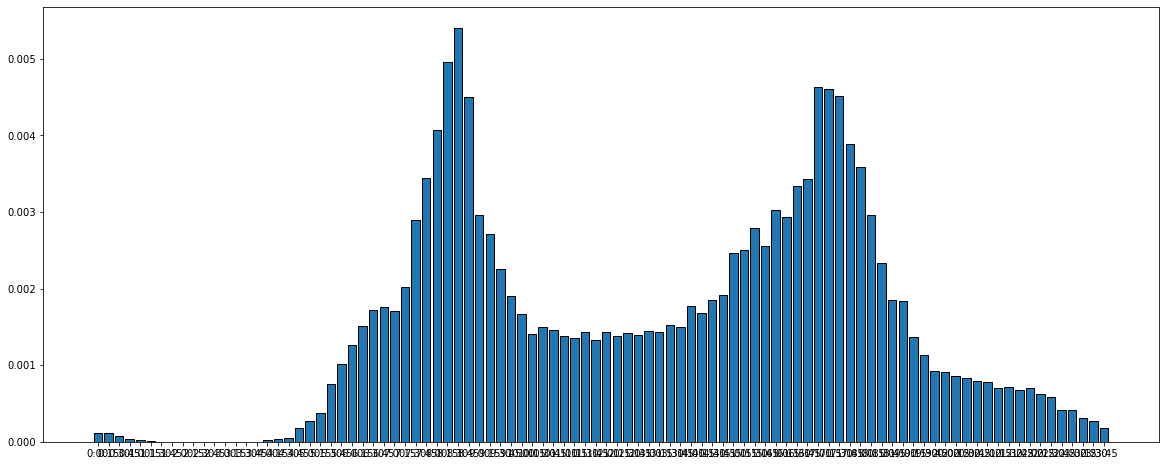

In [50]:
distdate(comb(NOV_train,20201116)) # Monday

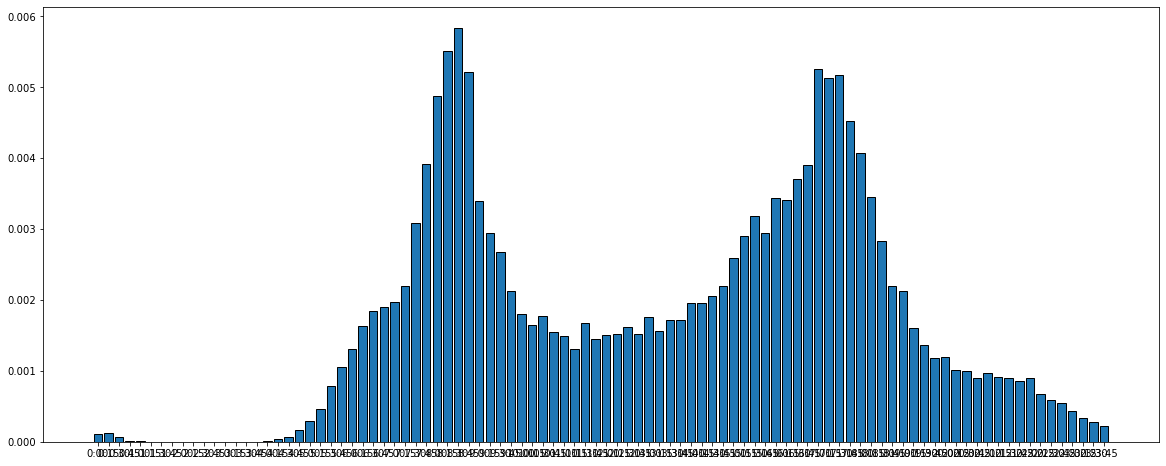

In [51]:
distdate(comb(NOV_train,20201117)) # Tuesday

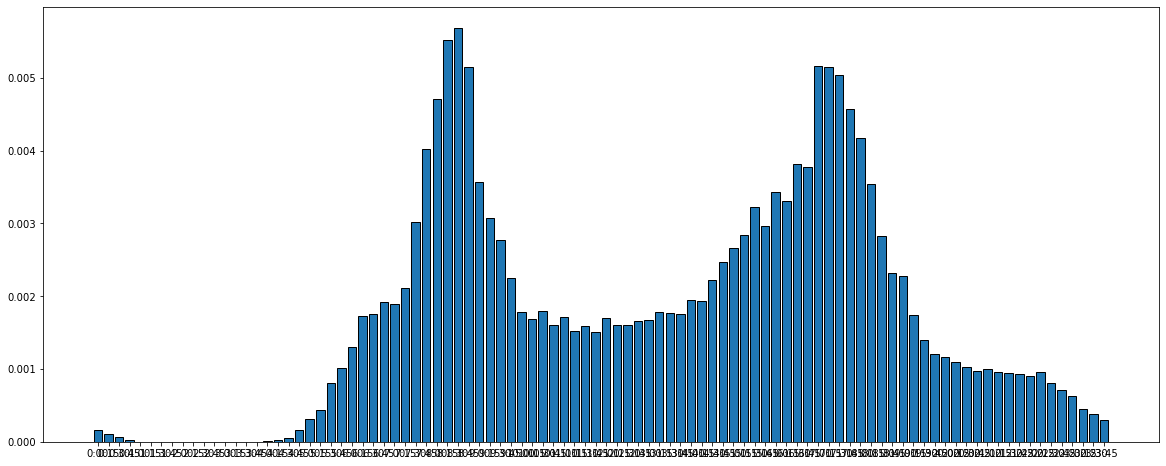

In [52]:
distdate(comb(NOV_train,20201118)) # Wednesday

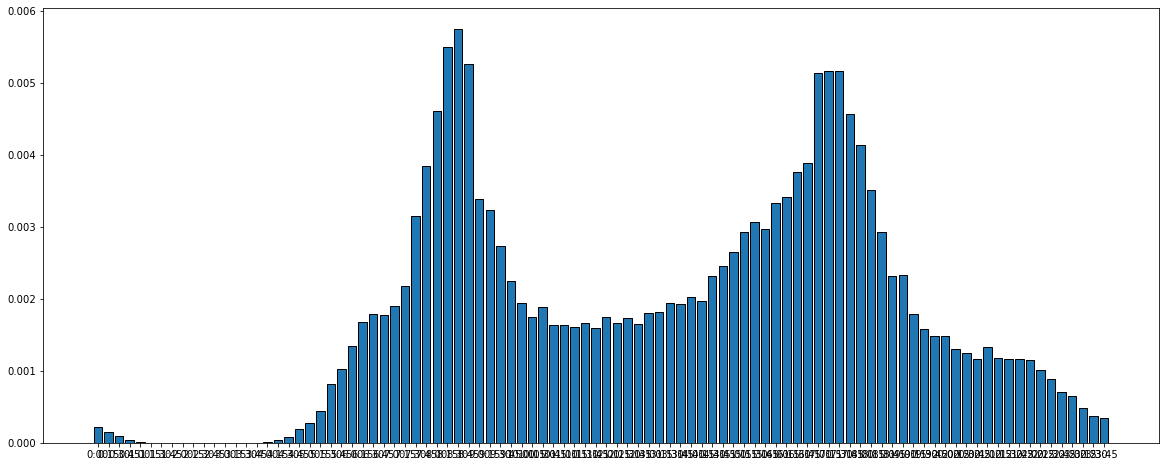

In [53]:
distdate(comb(NOV_train,20201119)) # Thursday

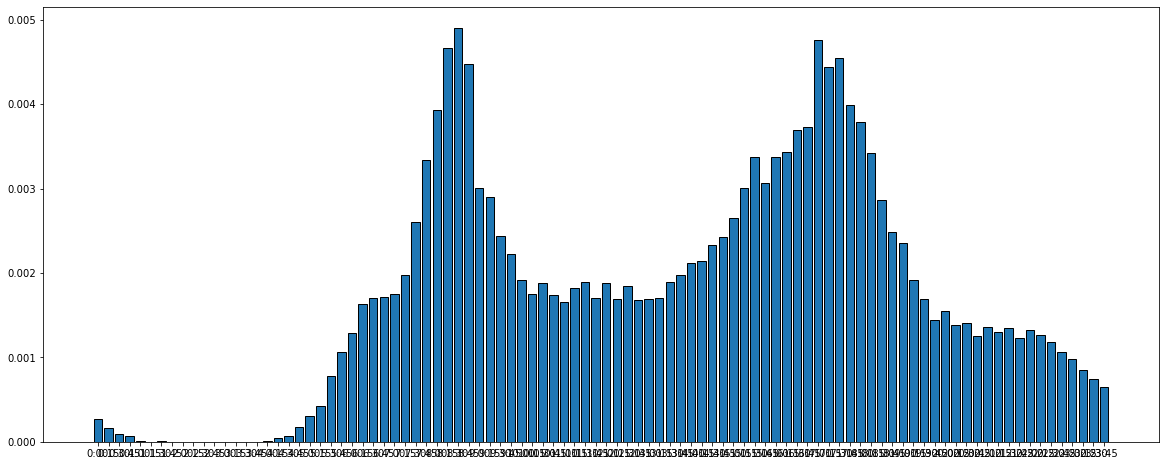

In [54]:
distdate(comb(NOV_train,20201120)) # Friday

In [55]:
AUG_train.head()

,Unnamed: 0,mode,date,tap,time,loc,count,%
95562,95562,train,20200824,off,0:00,2000,23,0.000014
95564,95564,train,20200824,off,0:15,2000,36,0.000022
95567,95567,train,20200824,off,0:15,2000,22,0.000013
95569,95569,train,20200824,off,0:30,2000,21,0.000013
95576,95576,train,20200824,off,4:15,2000,19,0.000011


This next section creates a new dataframe holding all the specific dates' percentage data

In [56]:
allpercdata = pd.DataFrame()
allpercdata['time'] = listtime

allpercdata['FEB_Mon_%'] = comb(FEB_train,20200224)['%']
allpercdata['FEB_Tues_%'] = comb(FEB_train,20200225)['%']
allpercdata['FEB_Wed_%'] = comb(FEB_train,20200226)['%']
allpercdata['FEB_Thurs_%'] = comb(FEB_train,20200227)['%']
allpercdata['FEB_Fri_%'] = comb(FEB_train,20200228)['%']

allpercdata['MAR_Mon_%'] = comb(MAR_train,20200323)['%']
allpercdata['MAR_Tues_%'] = comb(MAR_train,20200324)['%']
allpercdata['MAR_Wed_%'] = comb(MAR_train,20200325)['%']
allpercdata['MAR_Thurs_%'] = comb(MAR_train,20200326)['%']
allpercdata['MAR_Fri_%'] = comb(MAR_train,20200327)['%']

allpercdata['AUG_Mon_%'] = comb(AUG_train,20200824)['%']
allpercdata['AUG_Tues_%'] = comb(AUG_train,20200825)['%']
allpercdata['AUG_Wed_%'] = comb(AUG_train,20200826)['%']
allpercdata['AUG_Thurs_%'] = comb(AUG_train,20200827)['%']
allpercdata['AUG_Fri_%'] = comb(AUG_train,20200828)['%']

allpercdata['NOV_Mon_%'] = comb(NOV_train,20201116)['%']
allpercdata['NOV_Tues_%'] = comb(NOV_train,20201117)['%']
allpercdata['NOV_Wed_%'] = comb(NOV_train,20201118)['%']
allpercdata['NOV_Thurs_%'] = comb(NOV_train,20201119)['%']
allpercdata['NOV_Fri_%'] = comb(NOV_train,20201120)['%']

allpercdata

,time,FEB_Mon_%,FEB_Tues_%,FEB_Wed_%,FEB_Thurs_%,FEB_Fri_%,MAR_Mon_%,MAR_Tues_%,MAR_Wed_%,MAR_Thurs_%,...,AUG_Mon_%,AUG_Tues_%,AUG_Wed_%,AUG_Thurs_%,AUG_Fri_%,NOV_Mon_%,NOV_Tues_%,NOV_Wed_%,NOV_Thurs_%,NOV_Fri_%
0,0:00,0.000102,0.000102,0.000122,0.000160,0.000221,0.000199,0.000089,0.000094,0.000077,...,0.000094,0.000130,0.000171,0.000176,0.000037,0.000117,0.000106,0.000159,0.000215,0.000272
1,0:15,0.000079,0.000068,0.000078,0.000098,0.000142,0.000142,0.000023,0.000030,0.000042,...,0.000083,0.000071,0.000098,0.000105,0.000000,0.000112,0.000121,0.000109,0.000157,0.000167
2,0:30,0.000056,0.000040,0.000043,0.000052,0.000085,0.000094,0.000024,0.000000,0.000024,...,0.000027,0.000030,0.000055,0.000045,0.000000,0.000070,0.000073,0.000068,0.000096,0.000095
3,0:45,0.000030,0.000015,0.000026,0.000024,0.000036,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000043,0.000011,0.000027,0.000036,0.000070
4,1:00,0.000007,0.000000,0.000000,0.000004,0.000009,0.000023,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000009,0.000000,0.000011,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,22:45,0.000382,0.000413,0.000531,0.000593,0.001034,0.000359,0.000372,0.000335,0.000338,...,0.000373,0.000460,0.000564,0.000129,0.000902,0.000412,0.000546,0.000707,0.000701,0.001068
92,23:00,0.000312,0.000361,0.000450,0.000483,0.000877,0.000424,0.000316,0.000281,0.000281,...,0.000373,0.000400,0.000463,0.000106,0.000818,0.000417,0.000437,0.000627,0.000657,0.000980
93,23:15,0.000238,0.000288,0.000305,0.000387,0.000749,0.000248,0.000241,0.000213,0.000214,...,0.000238,0.000269,0.000313,0.000063,0.000662,0.000316,0.000329,0.000454,0.000483,0.000851
94,23:30,0.000165,0.000218,0.000224,0.000341,0.000610,0.000194,0.000166,0.000163,0.000116,...,0.000207,0.000241,0.000278,0.000060,0.000598,0.000265,0.000284,0.000385,0.000379,0.000739


In [57]:
allcountdata = pd.DataFrame()

allcountdata['time'] = listtime

allcountdata['FEB_Mon_count'] = comb(FEB_train,20200224)['count']
allcountdata['FEB_Tues_count'] = comb(FEB_train,20200225)['count']
allcountdata['FEB_Wed_count'] = comb(FEB_train,20200226)['count']
allcountdata['FEB_Thurs_count'] = comb(FEB_train,20200227)['count']
allcountdata['FEB_Fri_count'] = comb(FEB_train,20200228)['count']

allcountdata['MAR_Mon_count'] = comb(MAR_train,20200323)['count']
allcountdata['MAR_Tues_count'] = comb(MAR_train,20200324)['count']
allcountdata['MAR_Wed_count'] = comb(MAR_train,20200325)['count']
allcountdata['MAR_Thurs_count'] = comb(MAR_train,20200326)['count']
allcountdata['MAR_Fri_count'] = comb(MAR_train,20200327)['count']

allcountdata['AUG_Mon_count'] = comb(AUG_train,20200824)['count']
allcountdata['AUG_Tues_count'] = comb(AUG_train,20200825)['count']
allcountdata['AUG_Wed_count'] = comb(AUG_train,20200826)['count']
allcountdata['AUG_Thurs_count'] = comb(AUG_train,20200827)['count']
allcountdata['AUG_Fri_count'] = comb(AUG_train,20200828)['count']

allcountdata['NOV_Mon_count'] = comb(NOV_train,20201116)['count']
allcountdata['NOV_Tues_count'] = comb(NOV_train,20201117)['count']
allcountdata['NOV_Wed_count'] = comb(NOV_train,20201118)['count']
allcountdata['NOV_Thurs_count'] = comb(NOV_train,20201119)['count']
allcountdata['NOV_Fri_count'] = comb(NOV_train,20201120)['count']

allcountdata.head()

,time,FEB_Mon_count,FEB_Tues_count,FEB_Wed_count,FEB_Thurs_count,FEB_Fri_count,MAR_Mon_count,MAR_Tues_count,MAR_Wed_count,MAR_Thurs_count,...,AUG_Mon_count,AUG_Tues_count,AUG_Wed_count,AUG_Thurs_count,AUG_Fri_count,NOV_Mon_count,NOV_Tues_count,NOV_Wed_count,NOV_Thurs_count,NOV_Fri_count
0,0:00,482,484,575,756,1046,194,87,92,75,...,156,215,283,291,61,244,223,334,450,569
1,0:15,375,321,367,465,674,139,22,29,41,...,137,117,162,173,0,235,254,228,328,349
2,0:30,267,188,204,245,402,92,23,0,23,...,45,50,91,75,0,147,152,143,201,198
3,0:45,142,73,123,115,169,0,0,0,0,...,0,0,0,0,0,90,22,56,75,146
4,1:00,33,0,0,19,41,22,0,0,0,...,0,0,0,0,0,48,19,0,23,23


Since the time column is currently in a string and not a number, this will be converted to the form:
15:45 --> 15.75
Where the hours are whole numbers but minutes are converted to decimals.

In [58]:
timedec = [i/4 for i in range(96)]
allpercdata['time'] = timedec
allcountdata['time'] = timedec

In [59]:
allcountdata.head()

,time,FEB_Mon_count,FEB_Tues_count,FEB_Wed_count,FEB_Thurs_count,FEB_Fri_count,MAR_Mon_count,MAR_Tues_count,MAR_Wed_count,MAR_Thurs_count,...,AUG_Mon_count,AUG_Tues_count,AUG_Wed_count,AUG_Thurs_count,AUG_Fri_count,NOV_Mon_count,NOV_Tues_count,NOV_Wed_count,NOV_Thurs_count,NOV_Fri_count
0,0.00,482,484,575,756,1046,194,87,92,75,...,156,215,283,291,61,244,223,334,450,569
1,0.25,375,321,367,465,674,139,22,29,41,...,137,117,162,173,0,235,254,228,328,349
2,0.50,267,188,204,245,402,92,23,0,23,...,45,50,91,75,0,147,152,143,201,198
3,0.75,142,73,123,115,169,0,0,0,0,...,0,0,0,0,0,90,22,56,75,146
4,1.00,33,0,0,19,41,22,0,0,0,...,0,0,0,0,0,48,19,0,23,23


In [60]:
allcountdata.iloc[0,1]

482

To perform Kernel Density Estimation, it is simpler to use a vector of all the times recorded, thus the next section uses the counts for February Monday to generate an array of the times which observed tap ons and offs.

In [61]:
sample = np.ndarray(sum(allcountdata['FEB_Mon_count']))
counter = 0
for i in range(0,len(allcountdata['time'])):
    for j in range(0,allcountdata.iloc[i,1]):
        sample[counter] = allcountdata.iloc[i,0]
        counter+=1
sample

array([ 0.  ,  0.  ,  0.  , ..., 23.75, 23.75, 23.75])

Reshape into a vertical vector.

In [62]:
sample = sample.reshape((len(sample), 1))
sample

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [23.75],
       [23.75],
       [23.75]])

In [63]:
from numpy.random import normal
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

In [64]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
# bandwidth is used for smoothing, 0.5 selected as it is the range of 2 bins
model.fit(sample)

values = asarray([value for value in np.arange(0, 24, 1/12)])
# 1/12 used for more smooth curve as well as making the result more accurate*
values = values.reshape((len(values), 1))
probs = model.score_samples(values)
probs = exp(probs)

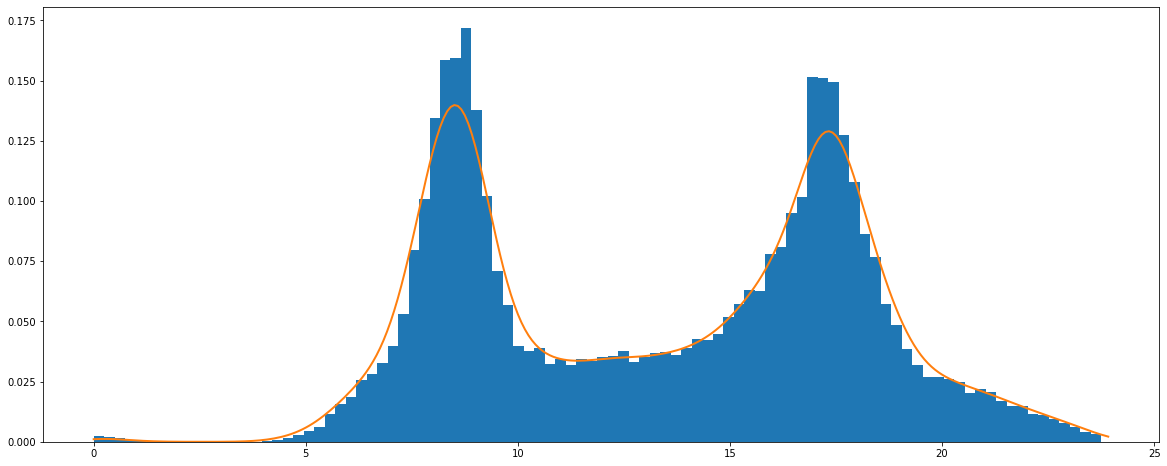

In [65]:
# plot the histogram and pdf
plt.hist(sample, bins=96, density=True)
# 96 bins since that is how many time bins there are
plt.plot(values[:], probs, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

Our goal here is to find the one hour period where the most number of people are seen to maximise the total number of people who could be handed advertisements in said 1 hour.

This is done by applying the trapezoidal rule on the probabilities found in the KDE. Given that the values every 5 minutes (1/12), we can find the best hour long period down to 5 minute accuracy.

In [66]:
hourareas = list()
for i in range(0,len(probs)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs[i+j]+probs[i+j+1])/2)*(1/12)
        
    hourareas.append(area)

hourareas.index(max(hourareas))

96

Therefore the period from index 96 to 108 has the greatest area beneath it. Since each index measures 12:00am + 5 minutes for each index, this corresponds to the time period 12:00 + 5 * 96 = 12:00 + 480 minutes = 12:00 + 8 hours = 8:00am to 9:00 am

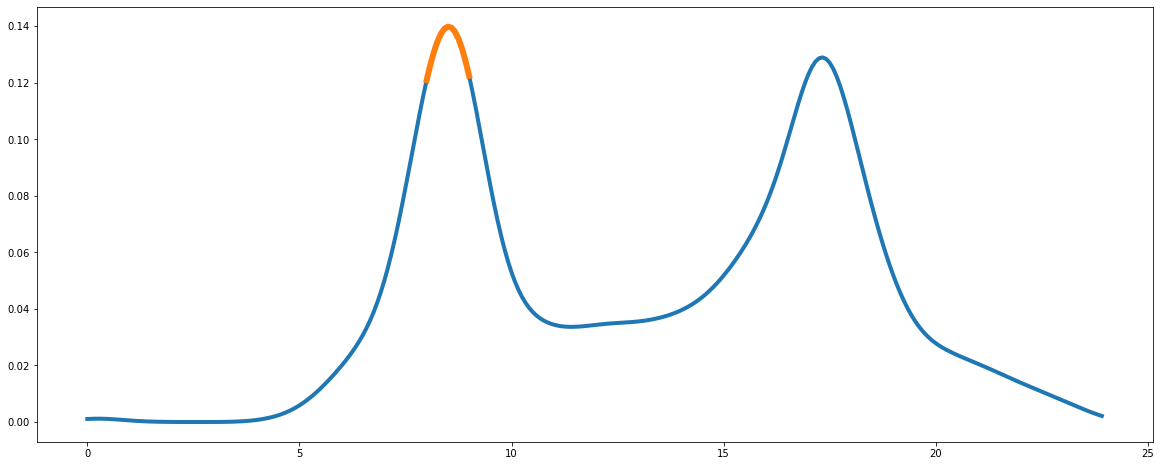

In [67]:
plt.plot(values[:], probs, linewidth=4)
plt.plot(values[96:109], probs[96:109], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

### This is the process used for the train data in the next section for each of the five highest traffic locations separated into weekdays and weekends:

#### Weekdays:

In [89]:
NOV_train_2000 = pc_time_loc_NOV[(pc_time_loc_NOV['mode']=='train') & (pc_time_loc_NOV['loc']==2000)]
FEB_train_2000 = pc_time_loc_FEB[(pc_time_loc_FEB['mode']=='train') & (pc_time_loc_FEB['loc']==2000)]
MAR_train_2000 = pc_time_loc_MAR[(pc_time_loc_MAR['mode']=='train') & (pc_time_loc_MAR['loc']==2000)]
AUG_train_2000 = pc_time_loc_AUG[(pc_time_loc_AUG['mode']=='train') & (pc_time_loc_AUG['loc']==2000)]

NOV_train_2150 = pc_time_loc_NOV[(pc_time_loc_NOV['mode']=='train') & (pc_time_loc_NOV['loc']==2150)]
FEB_train_2150 = pc_time_loc_FEB[(pc_time_loc_FEB['mode']=='train') & (pc_time_loc_FEB['loc']==2150)]
MAR_train_2150 = pc_time_loc_MAR[(pc_time_loc_MAR['mode']=='train') & (pc_time_loc_MAR['loc']==2150)]
AUG_train_2150 = pc_time_loc_AUG[(pc_time_loc_AUG['mode']=='train') & (pc_time_loc_AUG['loc']==2150)]

NOV_train_2022 = pc_time_loc_NOV[(pc_time_loc_NOV['mode']=='train') & (pc_time_loc_NOV['loc']==2022)]
FEB_train_2022 = pc_time_loc_FEB[(pc_time_loc_FEB['mode']=='train') & (pc_time_loc_FEB['loc']==2022)]
MAR_train_2022 = pc_time_loc_MAR[(pc_time_loc_MAR['mode']=='train') & (pc_time_loc_MAR['loc']==2022)]
AUG_train_2022 = pc_time_loc_AUG[(pc_time_loc_AUG['mode']=='train') & (pc_time_loc_AUG['loc']==2022)]

NOV_train_2067 = pc_time_loc_NOV[(pc_time_loc_NOV['mode']=='train') & (pc_time_loc_NOV['loc']==2067)]
FEB_train_2067 = pc_time_loc_FEB[(pc_time_loc_FEB['mode']=='train') & (pc_time_loc_FEB['loc']==2067)]
MAR_train_2067 = pc_time_loc_MAR[(pc_time_loc_MAR['mode']=='train') & (pc_time_loc_MAR['loc']==2067)]
AUG_train_2067 = pc_time_loc_AUG[(pc_time_loc_AUG['mode']=='train') & (pc_time_loc_AUG['loc']==2067)]

NOV_train_2135 = pc_time_loc_NOV[(pc_time_loc_NOV['mode']=='train') & (pc_time_loc_NOV['loc']==2135)]
FEB_train_2135 = pc_time_loc_FEB[(pc_time_loc_FEB['mode']=='train') & (pc_time_loc_FEB['loc']==2135)]
MAR_train_2135 = pc_time_loc_MAR[(pc_time_loc_MAR['mode']=='train') & (pc_time_loc_MAR['loc']==2135)]
AUG_train_2135 = pc_time_loc_AUG[(pc_time_loc_AUG['mode']=='train') & (pc_time_loc_AUG['loc']==2135)]

NOV_train_2000['%'] = NOV_train_2000['count']/sum(NOV_train_2000['count'])
FEB_train_2000['%'] = FEB_train_2000['count']/sum(FEB_train_2000['count'])
MAR_train_2000['%'] = MAR_train_2000['count']/sum(MAR_train_2000['count'])
AUG_train_2000['%'] = AUG_train_2000['count']/sum(AUG_train_2000['count'])

NOV_train_2150['%'] = NOV_train_2150['count']/sum(NOV_train_2150['count'])
FEB_train_2150['%'] = FEB_train_2150['count']/sum(FEB_train_2150['count'])
MAR_train_2150['%'] = MAR_train_2150['count']/sum(MAR_train_2150['count'])
AUG_train_2150['%'] = AUG_train_2150['count']/sum(AUG_train_2150['count'])

NOV_train_2022['%'] = NOV_train_2022['count']/sum(NOV_train_2022['count'])
FEB_train_2022['%'] = FEB_train_2022['count']/sum(FEB_train_2022['count'])
MAR_train_2022['%'] = MAR_train_2022['count']/sum(MAR_train_2022['count'])
AUG_train_2022['%'] = AUG_train_2022['count']/sum(AUG_train_2022['count'])

NOV_train_2067['%'] = NOV_train_2067['count']/sum(NOV_train_2067['count'])
FEB_train_2067['%'] = FEB_train_2067['count']/sum(FEB_train_2067['count'])
MAR_train_2067['%'] = MAR_train_2067['count']/sum(MAR_train_2067['count'])
AUG_train_2067['%'] = AUG_train_2067['count']/sum(AUG_train_2067['count'])

NOV_train_2135['%'] = NOV_train_2135['count']/sum(NOV_train_2135['count'])
FEB_train_2135['%'] = FEB_train_2135['count']/sum(FEB_train_2135['count'])
MAR_train_2135['%'] = MAR_train_2135['count']/sum(MAR_train_2135['count'])
AUG_train_2135['%'] = AUG_train_2135['count']/sum(AUG_train_2135['count'])

For each suburb, all time data for each weekday is added together:

In [90]:
def comb_all_wd(df,mon):
    df = df[df['date']<=mon+4]
    result = pd.DataFrame()
    listcount = [0 for i in range(96)]
    listperc = [0 for i in range(96)]
    for i in range(0,len(df)):
        index = listtime.index(df.iloc[i,4])
        listcount[index] = listcount[index] + df.iloc[i,6]
        listperc[index] = listperc[index] + df.iloc[i,7]
    result['time'] = listtime
    result['%'] = listperc
    result['count'] = listcount
    return result

In [91]:
NOV_train_2000_wd = comb_all_wd(NOV_train_2000,20201116)
FEB_train_2000_wd = comb_all_wd(FEB_train_2000,20200224)
MAR_train_2000_wd = comb_all_wd(MAR_train_2000,20200323)
AUG_train_2000_wd = comb_all_wd(AUG_train_2000,20200824)

NOV_train_2150_wd = comb_all_wd(NOV_train_2150,20201116)
FEB_train_2150_wd = comb_all_wd(FEB_train_2150,20200224)
MAR_train_2150_wd = comb_all_wd(MAR_train_2150,20200323)
AUG_train_2150_wd = comb_all_wd(AUG_train_2150,20200824)

NOV_train_2022_wd = comb_all_wd(NOV_train_2022,20201116)
FEB_train_2022_wd = comb_all_wd(FEB_train_2022,20200224)
MAR_train_2022_wd = comb_all_wd(MAR_train_2022,20200323)
AUG_train_2022_wd = comb_all_wd(AUG_train_2022,20200824)

NOV_train_2067_wd = comb_all_wd(NOV_train_2067,20201116)
FEB_train_2067_wd = comb_all_wd(FEB_train_2067,20200224)
MAR_train_2067_wd = comb_all_wd(MAR_train_2067,20200323)
AUG_train_2067_wd = comb_all_wd(AUG_train_2067,20200824)

NOV_train_2135_wd = comb_all_wd(NOV_train_2135,20201116)
FEB_train_2135_wd = comb_all_wd(FEB_train_2135,20200224)
MAR_train_2135_wd = comb_all_wd(MAR_train_2135,20200323)
AUG_train_2135_wd = comb_all_wd(AUG_train_2135,20200824)

In [92]:
allcountdatawd = pd.DataFrame()

allcountdatawd['time'] = timedec
allcountdatawd['2000'] = FEB_train_2000_wd['count'] + MAR_train_2000_wd['count'] + AUG_train_2000_wd['count'] + NOV_train_2000_wd['count']
allcountdatawd['2150'] = FEB_train_2150_wd['count'] + MAR_train_2150_wd['count'] + AUG_train_2150_wd['count'] + NOV_train_2150_wd['count']
allcountdatawd['2022'] = FEB_train_2022_wd['count'] + MAR_train_2022_wd['count'] + AUG_train_2022_wd['count'] + NOV_train_2022_wd['count']
allcountdatawd['2067'] = FEB_train_2067_wd['count'] + MAR_train_2067_wd['count'] + AUG_train_2067_wd['count'] + NOV_train_2067_wd['count']
allcountdatawd['2135'] = FEB_train_2135_wd['count'] + MAR_train_2135_wd['count'] + AUG_train_2135_wd['count'] + NOV_train_2135_wd['count']

allcountdatawd.head()

,time,2000,2150,2022,2067,2135
0,0.00,6716,722,306,258,1349
1,0.25,4434,115,126,114,1053
2,0.50,2564,193,75,120,738
3,0.75,1011,132,0,0,54
4,1.00,228,64,0,21,297


In [93]:
sample2000 = np.ndarray(sum(allcountdatawd['2000']))
sample2150 = np.ndarray(sum(allcountdatawd['2150']))
sample2022 = np.ndarray(sum(allcountdatawd['2022']))
sample2067 = np.ndarray(sum(allcountdatawd['2067']))
sample2135 = np.ndarray(sum(allcountdatawd['2135']))
counter2000 = 0
counter2150 = 0
counter2022 = 0
counter2067 = 0
counter2135 = 0
for i in range(0,len(allcountdatawd['time'])):
    for j in range(0,allcountdatawd.iloc[i,1]):
        sample2000[counter2000] = allcountdatawd.iloc[i,0]
        counter2000+=1
    for j in range(0,allcountdatawd.iloc[i,2]):
        sample2150[counter2150] = allcountdatawd.iloc[i,0]
        counter2150+=1
    for j in range(0,allcountdatawd.iloc[i,3]):
        sample2022[counter2022] = allcountdatawd.iloc[i,0]
        counter2022+=1
    for j in range(0,allcountdatawd.iloc[i,4]):
        sample2067[counter2067] = allcountdatawd.iloc[i,0]
        counter2067+=1
    for j in range(0,allcountdatawd.iloc[i,5]):
        sample2135[counter2135] = allcountdatawd.iloc[i,0]
        counter2135+=1

        
sample2000 = sample2000.reshape((len(sample2000), 1))
sample2150 = sample2150.reshape((len(sample2150), 1))
sample2022 = sample2022.reshape((len(sample2022), 1))
sample2067 = sample2067.reshape((len(sample2067), 1))
sample2135 = sample2135.reshape((len(sample2135), 1))

Note: a bandwidth of 0.25 was used here as it better fits the histograms which makes for better prediction accuracy.

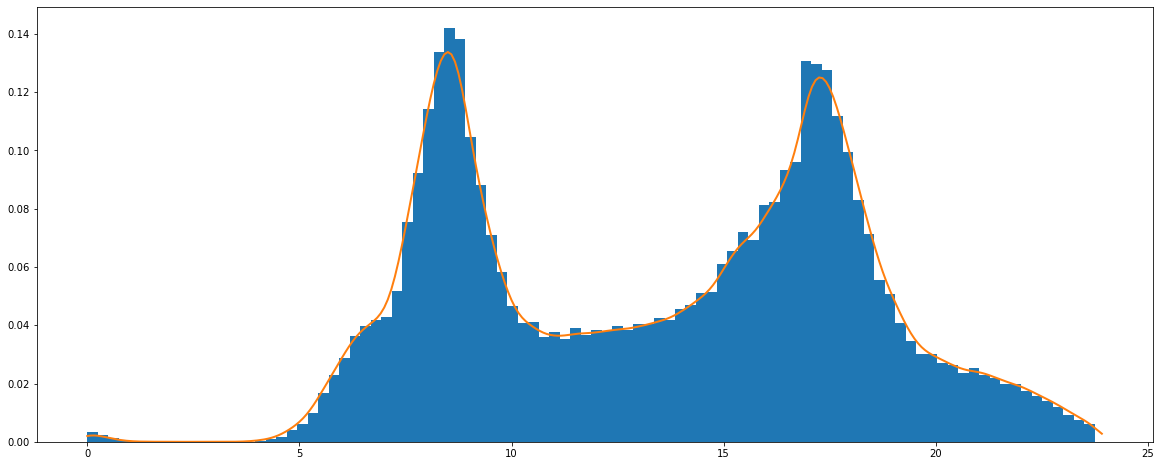

In [94]:
# This one takes a while to run
model = KernelDensity(bandwidth=0.25, kernel='gaussian')
model.fit(sample2000)
values2000 = asarray([value for value in np.arange(0, 24, 1/12)])
values2000 = values2000.reshape((len(values2000), 1))
probs2000 = model.score_samples(values2000)
probs2000 = exp(probs2000)
plt.hist(sample2000, bins=96, density=True)
plt.plot(values2000[:], probs2000, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

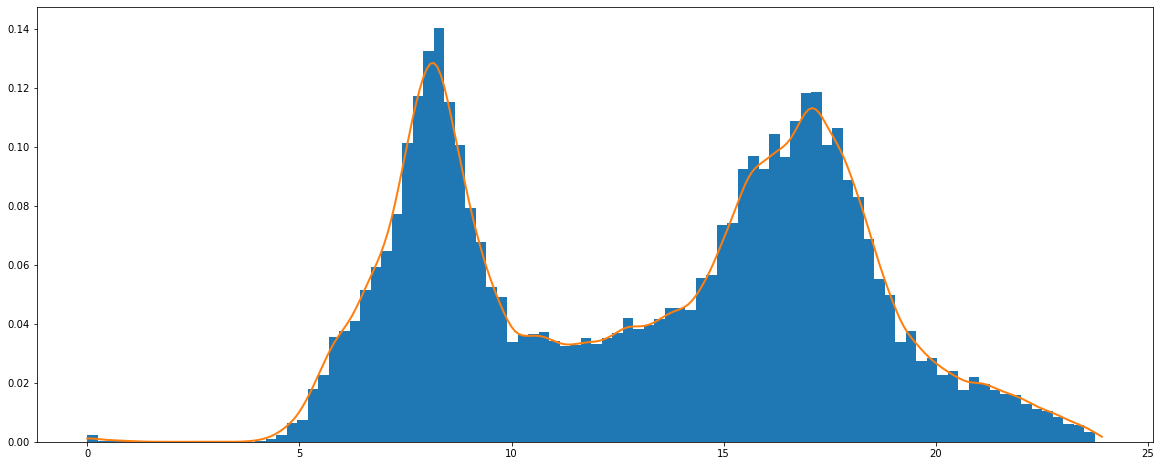

In [95]:
model = KernelDensity(bandwidth=0.25, kernel='gaussian')
model.fit(sample2150)
values2150 = asarray([value for value in np.arange(0, 24, 1/12)])
values2150 = values.reshape((len(values2150), 1))
probs2150 = model.score_samples(values2150)
probs2150 = exp(probs2150)
plt.hist(sample2150, bins=96, density=True)
plt.plot(values2150[:], probs2150, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

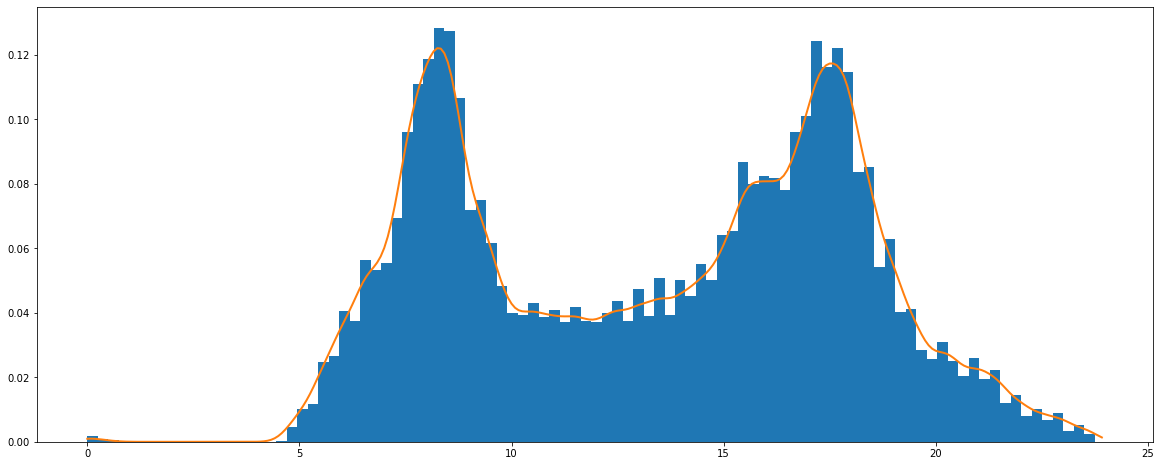

In [96]:
model = KernelDensity(bandwidth=0.25, kernel='gaussian')
model.fit(sample2022)
values2022 = asarray([value for value in np.arange(0, 24, 1/12)])
values2022 = values.reshape((len(values2022), 1))
probs2022 = model.score_samples(values2022)
probs2022 = exp(probs2022)
plt.hist(sample2022, bins=96, density=True)
plt.plot(values2022[:], probs2022, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

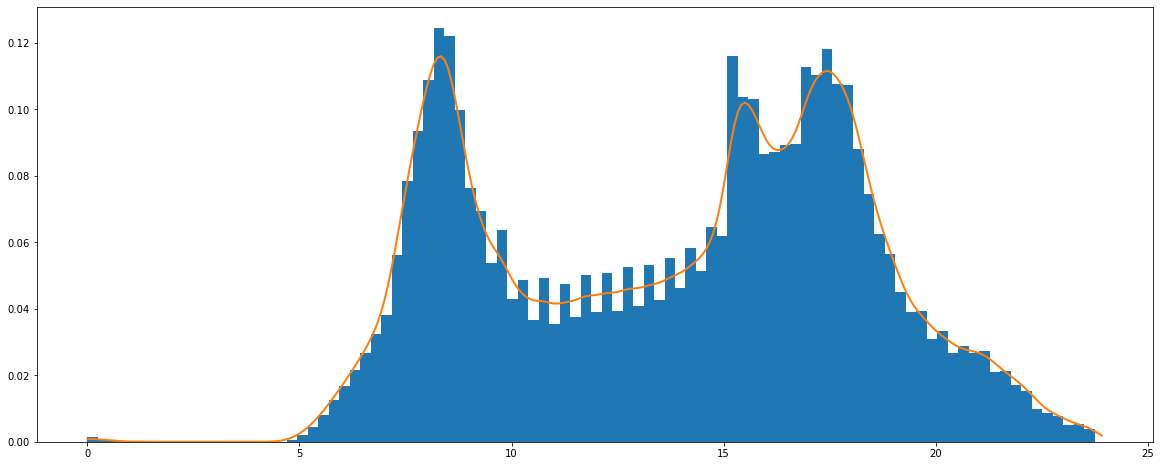

In [97]:
model = KernelDensity(bandwidth=0.25, kernel='gaussian')
model.fit(sample2067)
values2067 = asarray([value for value in np.arange(0, 24, 1/12)])
values2067 = values.reshape((len(values2067), 1))
probs2067 = model.score_samples(values2067)
probs2067 = exp(probs2067)
plt.hist(sample2067, bins=96, density=True)
plt.plot(values2067[:], probs2067, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

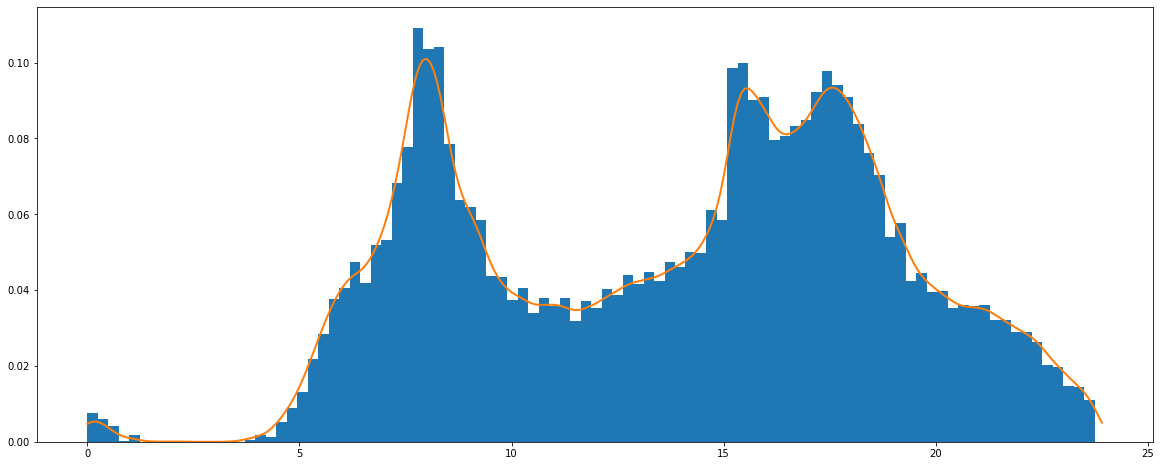

In [98]:
model = KernelDensity(bandwidth=0.25, kernel='gaussian')
model.fit(sample2135)
values2135 = asarray([value for value in np.arange(0, 24, 1/12)])
values2135 = values.reshape((len(values2135), 1))
probs2135 = model.score_samples(values2135)
probs2135 = exp(probs2135)
plt.hist(sample2135, bins=96, density=True)
plt.plot(values2135[:], probs2135, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

In [99]:
hourareas2000 = list()
for i in range(0,len(probs2000)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2000[i+j]+probs2000[i+j+1])/2)*(1/12)
        
    hourareas2000.append(area)
hourareas2000.index(max(hourareas2000))

96

In [100]:
hourareas2150 = list()
for i in range(0,len(probs2150)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2150[i+j]+probs2150[i+j+1])/2)*(1/12)
        
    hourareas2150.append(area)
hourareas2150.index(max(hourareas2150))

92

In [101]:
hourareas2022 = list()
for i in range(0,len(probs2022)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2022[i+j]+probs2022[i+j+1])/2)*(1/12)
        
    hourareas2022.append(area)
hourareas2022.index(max(hourareas2022))

93

In [102]:
hourareas2067 = list()
for i in range(0,len(probs2067)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2067[i+j]+probs2067[i+j+1])/2)*(1/12)
        
    hourareas2067.append(area)
hourareas2067.index(max(hourareas2067))

203

In [103]:
hourareas2135 = list()
for i in range(0,len(probs2135)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2135[i+j]+probs2135[i+j+1])/2)*(1/12)
        
    hourareas2135.append(area)
hourareas2135.index(max(hourareas2135))

90

### Results for Weekdays:

These five largest areas are as follows:

2000 : index 96 --> 8:00am to 9:00am

2150 : index 92 --> 7:40am to 8:40am

2022 : index 93 --> 7:45am to 8:45am

2067 : index 203 --> 4:55pm to 5:55pm

2135 : index 90 --> 7:30am to 8:30am

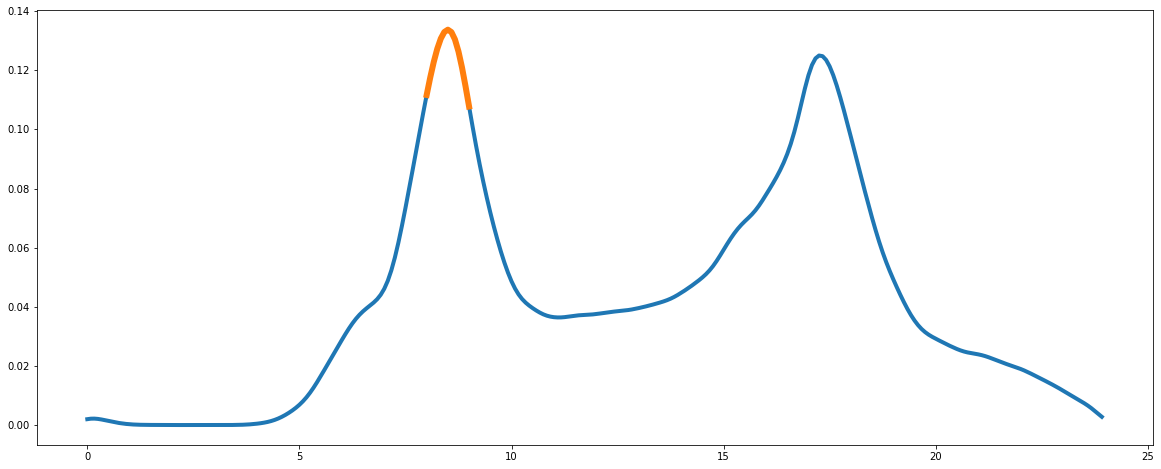

In [104]:
plt.plot(values2000[:], probs2000, linewidth=4)
plt.plot(values2000[96:109], probs2000[96:109], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

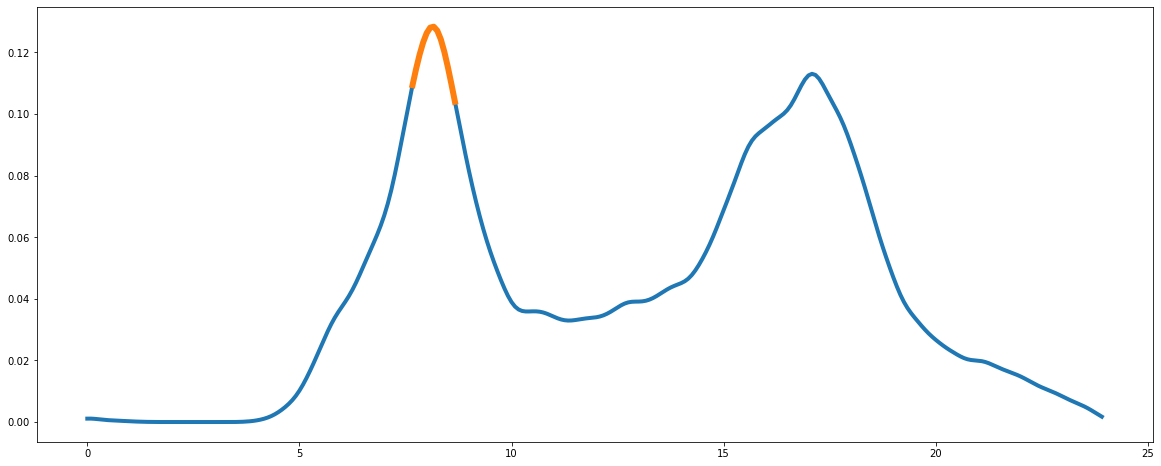

In [105]:
plt.plot(values2150[:], probs2150, linewidth=4)
plt.plot(values2150[92:105], probs2150[92:105], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

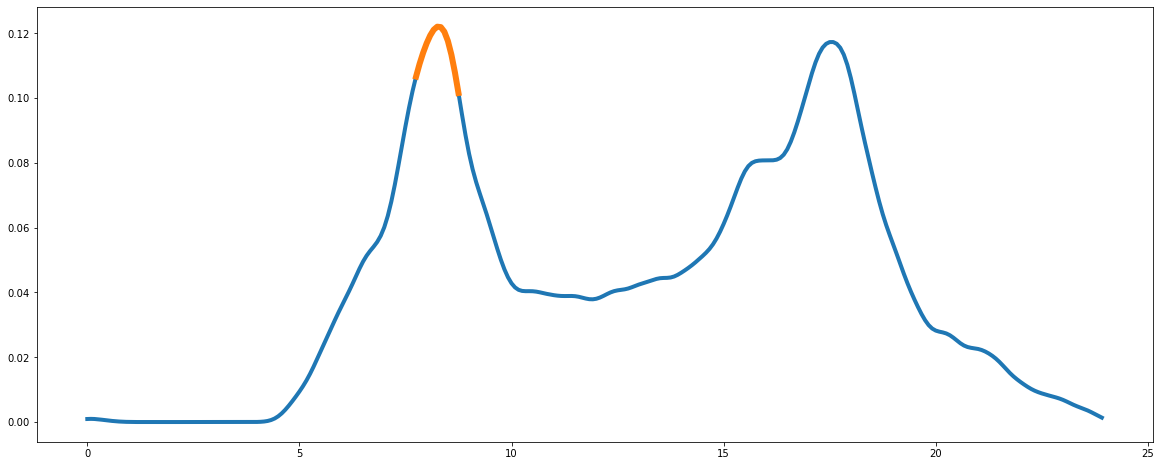

In [106]:
plt.plot(values2022[:], probs2022, linewidth=4)
plt.plot(values2022[93:106], probs2022[93:106], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

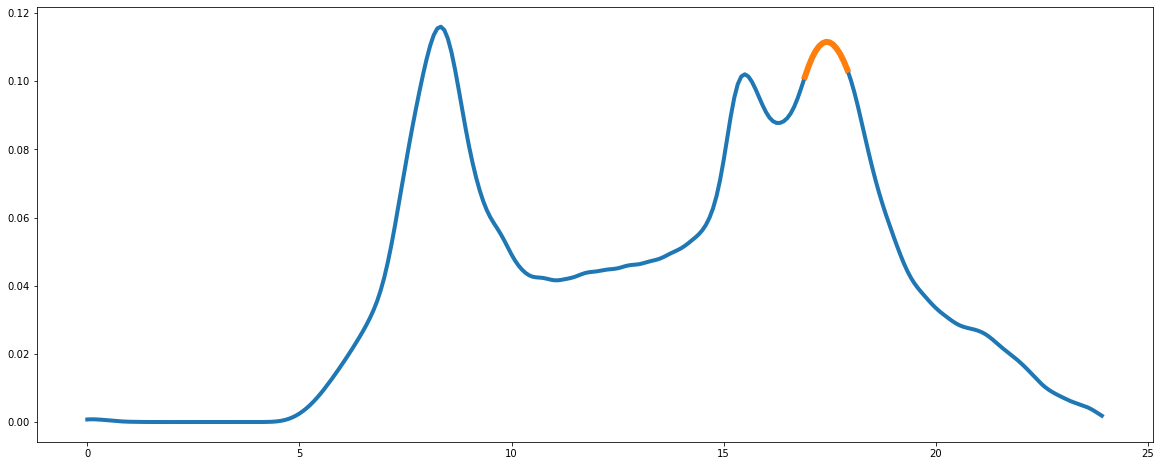

In [107]:
plt.plot(values2067[:], probs2067, linewidth=4)
plt.plot(values2067[203:216], probs2067[203:216], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

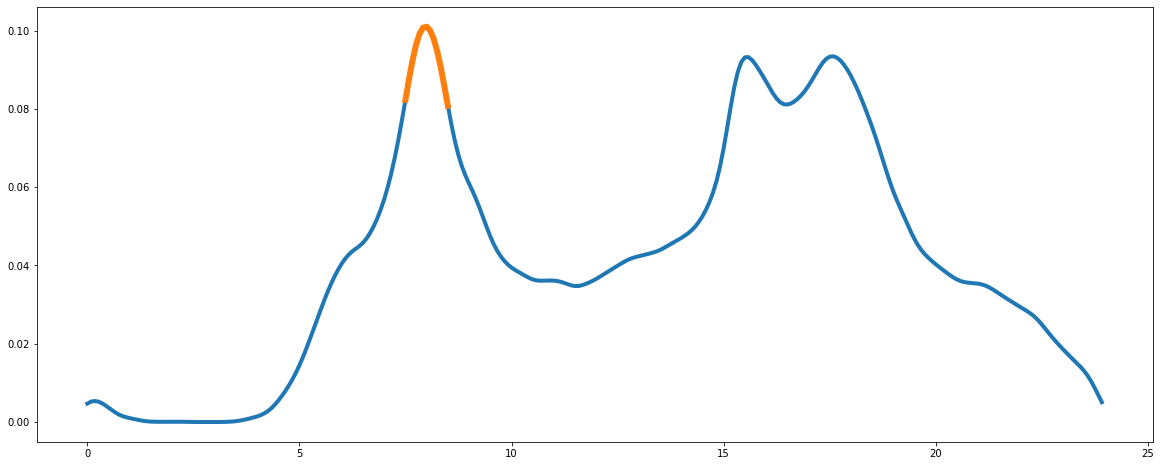

In [108]:
plt.plot(values2135[:], probs2135, linewidth=4)
plt.plot(values2135[90:103], probs2135[90:103], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

#### Weekends:

In [109]:
def comb_all_we(df,sat):
    df = df[(df['date']==sat) | (df['date']==sat+1)]
    result = pd.DataFrame()
    listcount = [0 for i in range(96)]
    listperc = [0 for i in range(96)]
    for i in range(0,len(df)):
        index = listtime.index(df.iloc[i,4])
        listcount[index] = listcount[index] + df.iloc[i,6]
        listperc[index] = listperc[index] + df.iloc[i,7]
    result['time'] = listtime
    result['%'] = listperc
    result['count'] = listcount
    return result

In [110]:
NOV_train_2000_we = comb_all_we(NOV_train_2000,20201121)
FEB_train_2000_we = comb_all_we(FEB_train_2000,20200229)
MAR_train_2000_we = comb_all_we(MAR_train_2000,20200328)
AUG_train_2000_we = comb_all_we(AUG_train_2000,20200829)

NOV_train_2150_we = comb_all_we(NOV_train_2150,20201121)
FEB_train_2150_we = comb_all_we(FEB_train_2150,20200229)
MAR_train_2150_we = comb_all_we(MAR_train_2150,20200328)
AUG_train_2150_we = comb_all_we(AUG_train_2150,20200829)

NOV_train_2022_we = comb_all_we(NOV_train_2022,20201121)
FEB_train_2022_we = comb_all_we(FEB_train_2022,20200229)
MAR_train_2022_we = comb_all_we(MAR_train_2022,20200328)
AUG_train_2022_we = comb_all_we(AUG_train_2022,20200829)

NOV_train_2067_we = comb_all_we(NOV_train_2067,20201121)
FEB_train_2067_we = comb_all_we(FEB_train_2067,20200229)
MAR_train_2067_we = comb_all_we(MAR_train_2067,20200328)
AUG_train_2067_we = comb_all_we(AUG_train_2067,20200829)

NOV_train_2135_we = comb_all_we(NOV_train_2135,20201121)
FEB_train_2135_we = comb_all_we(FEB_train_2135,20200229)
MAR_train_2135_we = comb_all_we(MAR_train_2135,20200328)
AUG_train_2135_we = comb_all_we(AUG_train_2135,20200829)

In [111]:
allcountdatawe = pd.DataFrame()

allcountdatawe['time'] = timedec
allcountdatawe['2000'] = FEB_train_2000_we['count'] + MAR_train_2000_we['count'] + AUG_train_2000_we['count'] + NOV_train_2000_we['count']
allcountdatawe['2150'] = FEB_train_2150_we['count'] + MAR_train_2150_we['count'] + AUG_train_2150_we['count'] + NOV_train_2150_we['count']
allcountdatawe['2022'] = FEB_train_2022_we['count'] + MAR_train_2022_we['count'] + AUG_train_2022_we['count'] + NOV_train_2022_we['count']
allcountdatawe['2067'] = FEB_train_2067_we['count'] + MAR_train_2067_we['count'] + AUG_train_2067_we['count'] + NOV_train_2067_we['count']
allcountdatawe['2135'] = FEB_train_2135_we['count'] + MAR_train_2135_we['count'] + AUG_train_2135_we['count'] + NOV_train_2135_we['count']

allcountdatawe.head()

,time,2000,2150,2022,2067,2135
0,0.00,6316,496,339,388,829
1,0.25,5291,206,193,217,671
2,0.50,4023,400,229,288,564
3,0.75,3697,207,93,203,501
4,1.00,2537,46,167,149,389


In [112]:
sample2000we = np.ndarray(sum(allcountdatawe['2000']))
sample2150we = np.ndarray(sum(allcountdatawe['2150']))
sample2022we = np.ndarray(sum(allcountdatawe['2022']))
sample2067we = np.ndarray(sum(allcountdatawe['2067']))
sample2135we = np.ndarray(sum(allcountdatawe['2135']))
counter2000we = 0
counter2150we = 0
counter2022we = 0
counter2067we = 0
counter2135we = 0
for i in range(0,len(allcountdatawe['time'])):
    for j in range(0,allcountdatawe.iloc[i,1]):
        sample2000we[counter2000we] = allcountdatawe.iloc[i,0]
        counter2000we+=1
    for j in range(0,allcountdatawe.iloc[i,2]):
        sample2150we[counter2150we] = allcountdatawe.iloc[i,0]
        counter2150we+=1
    for j in range(0,allcountdatawe.iloc[i,3]):
        sample2022we[counter2022we] = allcountdatawe.iloc[i,0]
        counter2022we+=1
    for j in range(0,allcountdatawe.iloc[i,4]):
        sample2067we[counter2067we] = allcountdatawe.iloc[i,0]
        counter2067we+=1
    for j in range(0,allcountdatawe.iloc[i,5]):
        sample2135we[counter2135we] = allcountdatawe.iloc[i,0]
        counter2135we+=1

        
sample2000we = sample2000we.reshape((len(sample2000we), 1))
sample2150we = sample2150we.reshape((len(sample2150we), 1))
sample2022we = sample2022we.reshape((len(sample2022we), 1))
sample2067we = sample2067we.reshape((len(sample2067we), 1))
sample2135we = sample2135we.reshape((len(sample2135we), 1))

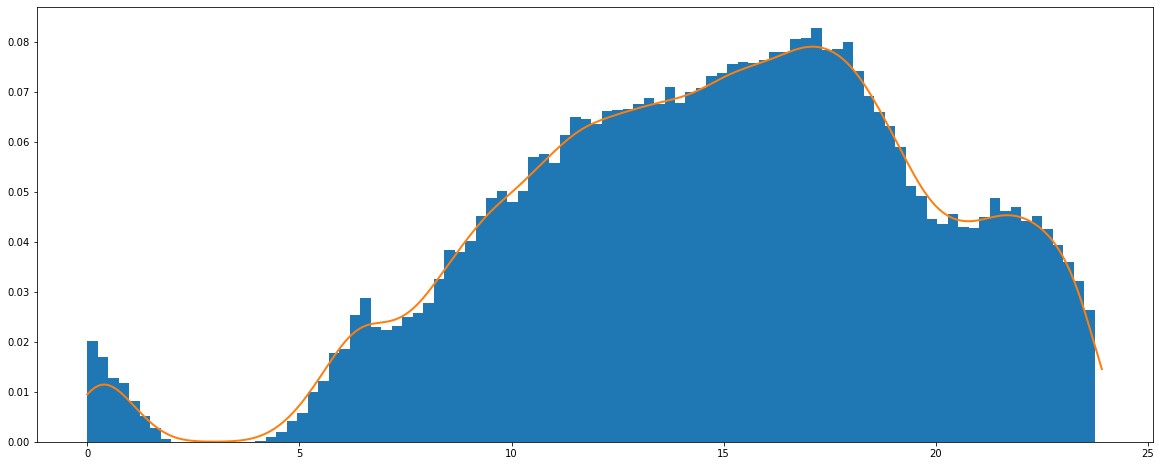

In [123]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
model.fit(sample2000we)
values2000we = asarray([value for value in np.arange(0, 24, 1/12)])
values2000we = values2000.reshape((len(values2000we), 1))
probs2000we = model.score_samples(values2000we)
probs2000we = exp(probs2000we)
plt.hist(sample2000we, bins=96, density=True)
plt.plot(values2000we[:], probs2000we, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

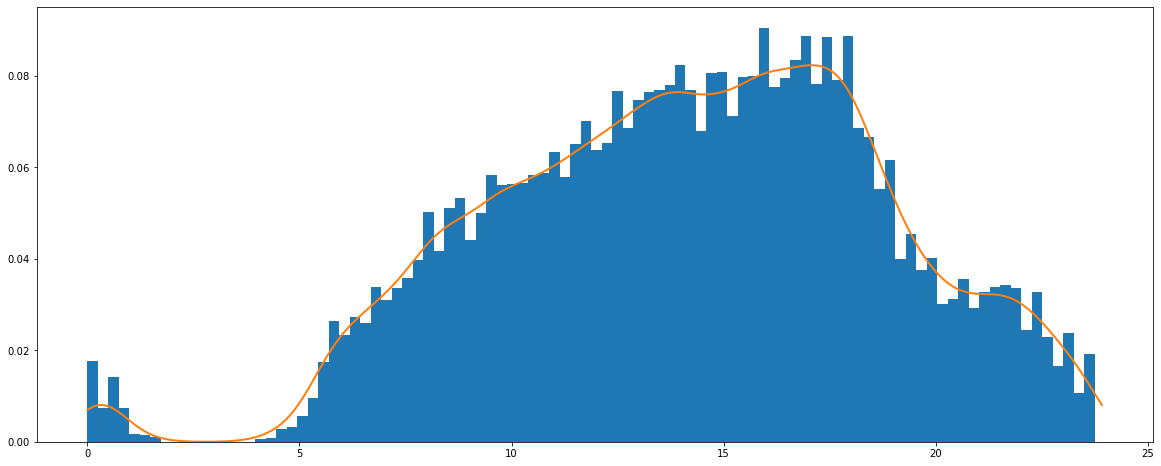

In [124]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
model.fit(sample2150we)
values2150we = asarray([value for value in np.arange(0, 24, 1/12)])
values2150we = values2150we.reshape((len(values2150we), 1))
probs2150we = model.score_samples(values2150we)
probs2150we = exp(probs2150we)
plt.hist(sample2150we, bins=96, density=True)
plt.plot(values2150we[:], probs2150we, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

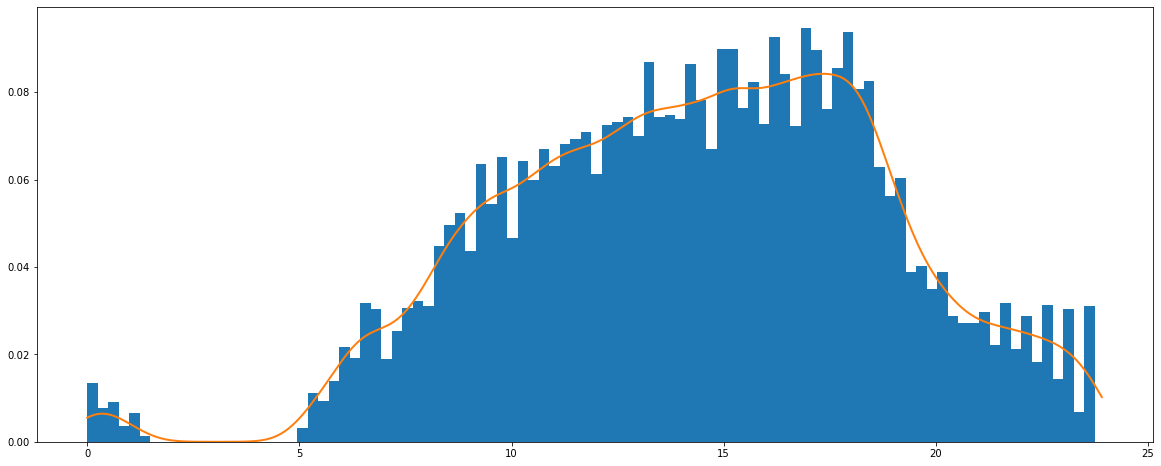

In [125]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
model.fit(sample2022we)
values2022we = asarray([value for value in np.arange(0, 24, 1/12)])
values2022we = values2022we.reshape((len(values2022we), 1))
probs2022we = model.score_samples(values2022we)
probs2022we = exp(probs2022we)
plt.hist(sample2022we, bins=96, density=True)
plt.plot(values2022we[:], probs2022we, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

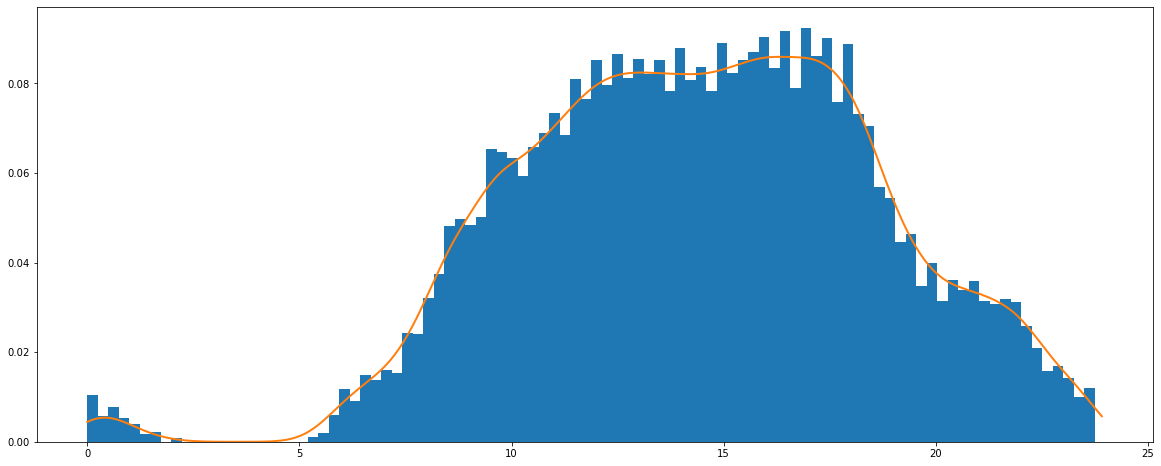

In [122]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
model.fit(sample2067we)
values2067we = asarray([value for value in np.arange(0, 24, 1/12)])
values2067we = values2067we.reshape((len(values2067we), 1))
probs2067we = model.score_samples(values2067we)
probs2067we = exp(probs2067we)
plt.hist(sample2067we, bins=96, density=True)
plt.plot(values2067we[:], probs2067we, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

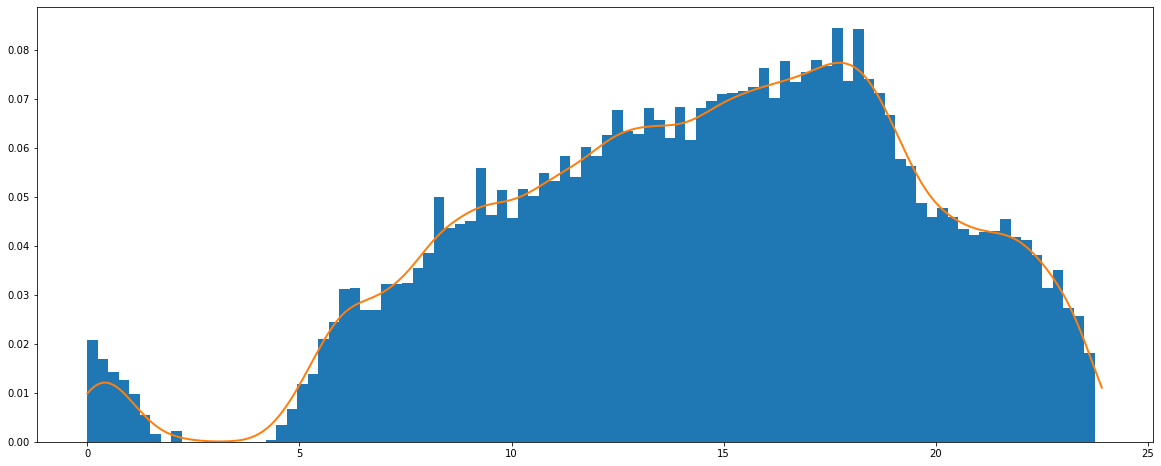

In [126]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
model.fit(sample2135we)
values2135we = asarray([value for value in np.arange(0, 24, 1/12)])
values2135we = values2135we.reshape((len(values2135we), 1))
probs2135we = model.score_samples(values2135we)
probs2135we = exp(probs2135we)
plt.hist(sample2135we, bins=96, density=True)
plt.plot(values2135we[:], probs2135we, linewidth=2)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

In [127]:
hourareas2000we = list()
for i in range(0,len(probs2000we)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2000we[i+j]+probs2000we[i+j+1])/2)*(1/12)
        
    hourareas2000we.append(area)
hourareas2000we.index(max(hourareas2000we))

199

In [128]:
hourareas2150we = list()
for i in range(0,len(probs2150we)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2150we[i+j]+probs2150we[i+j+1])/2)*(1/12)
        
    hourareas2150we.append(area)
hourareas2150we.index(max(hourareas2150we))

197

In [129]:
hourareas2022we = list()
for i in range(0,len(probs2022we)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2022we[i+j]+probs2022we[i+j+1])/2)*(1/12)
        
    hourareas2022we.append(area)
hourareas2022we.index(max(hourareas2022we))

201

In [131]:
hourareas2067we = list()
for i in range(0,len(probs2067we)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2067we[i+j]+probs2067we[i+j+1])/2)*(1/12)
        
    hourareas2067we.append(area)
hourareas2067we.index(max(hourareas2067we))

191

In [132]:
hourareas2135we = list()
for i in range(0,len(probs2135we)-12):
    area = 0
    for j in range(0,12):
        area = area + ((probs2135[i+j]+probs2135we[i+j+1])/2)*(1/12)
        
    hourareas2135we.append(area)
hourareas2135we.index(max(hourareas2135we))

205

### Results for Weekends:

These five largest areas are as follows:

2000 : index 199 --> 4:35pm to 5:35pm

2150 : index 197 --> 4:25pm to 5:25pm

2022 : index 201 --> 4:45pm to 5:45pm

2067 : index 191 --> 3:55pm to 4:55pm

2135 : index 205 --> 5:05pm to 6:05pm

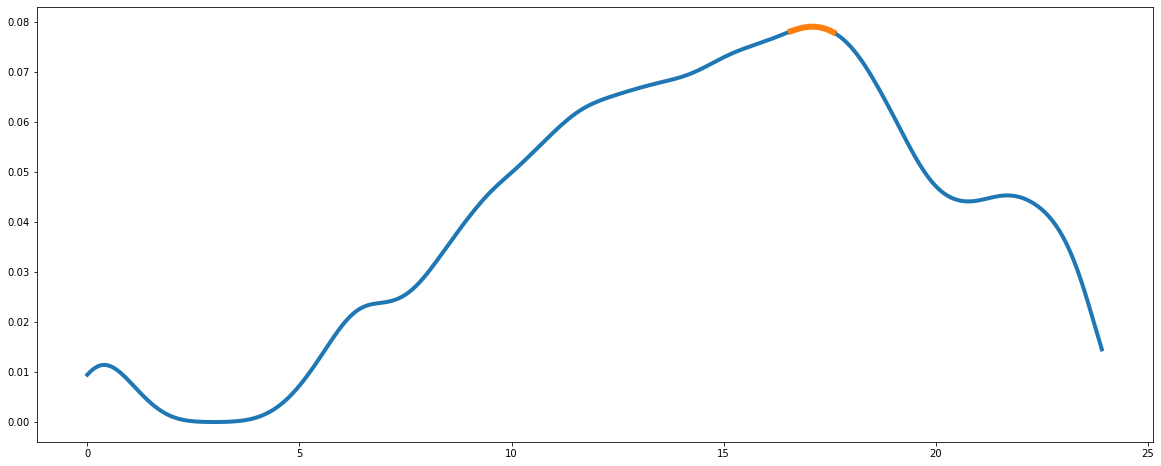

In [133]:
plt.plot(values2000we[:], probs2000we, linewidth=4)
plt.plot(values2000we[199:212], probs2000we[199:212], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

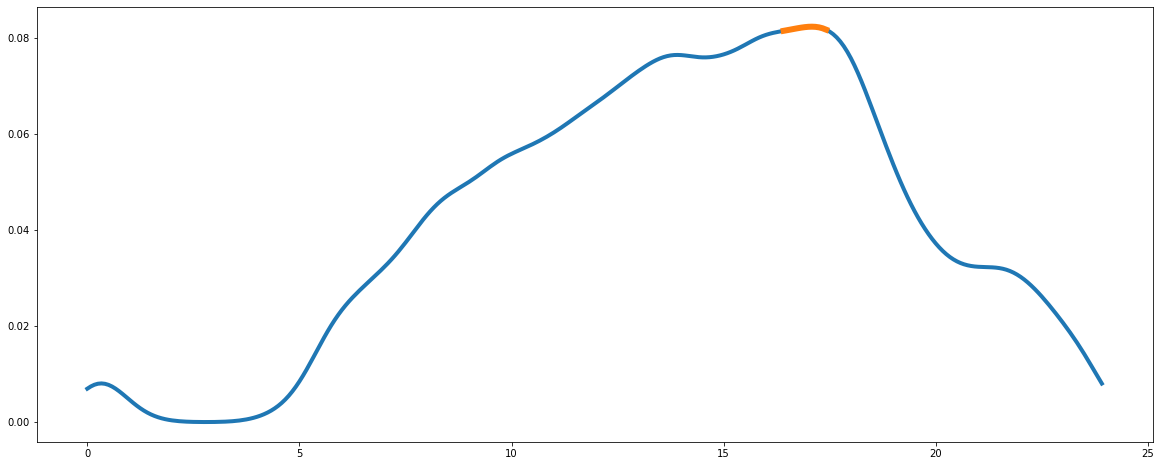

In [134]:
plt.plot(values2150we[:], probs2150we, linewidth=4)
plt.plot(values2150we[197:210], probs2150we[197:210], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

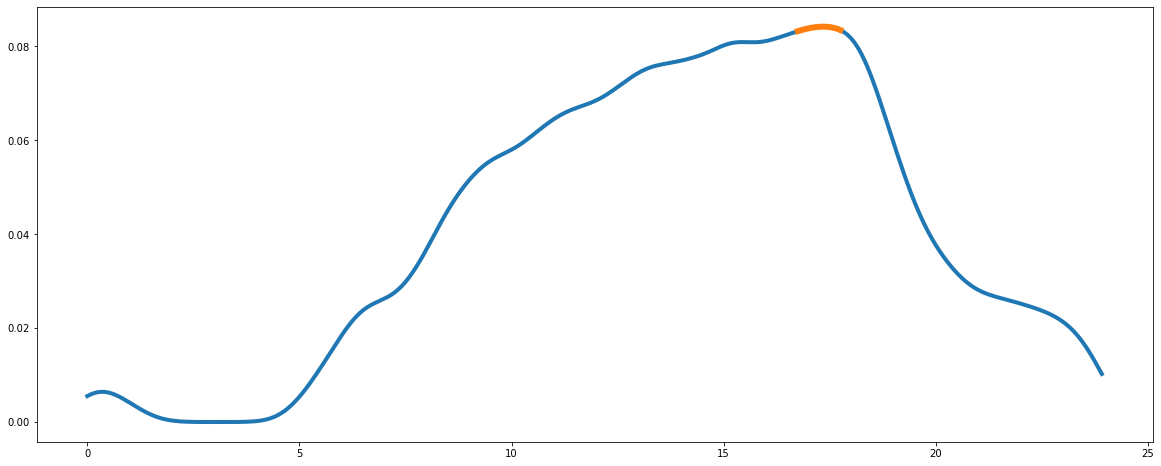

In [136]:
plt.plot(values2022we[:], probs2022we, linewidth=4)
plt.plot(values2022we[201:214], probs2022we[201:214], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

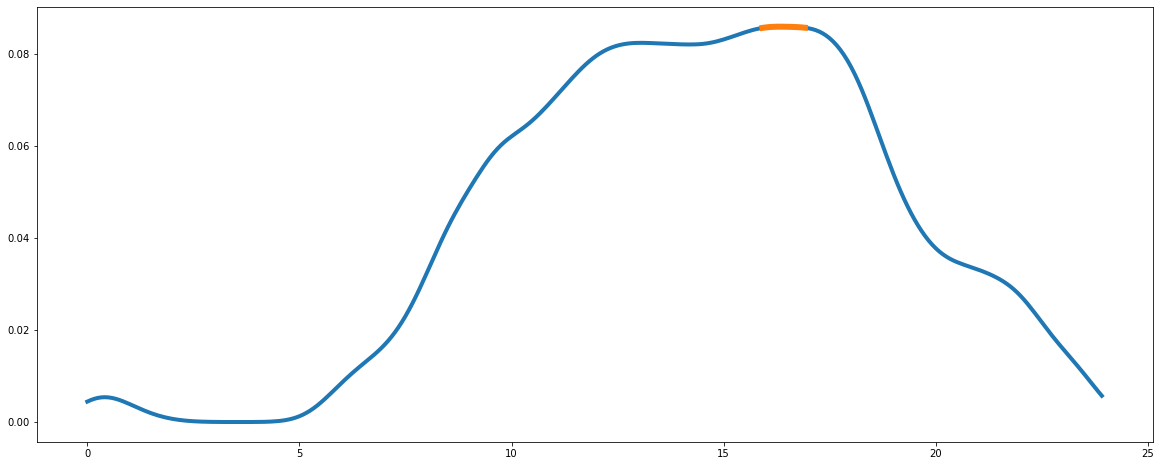

In [137]:
plt.plot(values2067we[:], probs2067we, linewidth=4)
plt.plot(values2067we[191:204], probs2067we[191:204], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

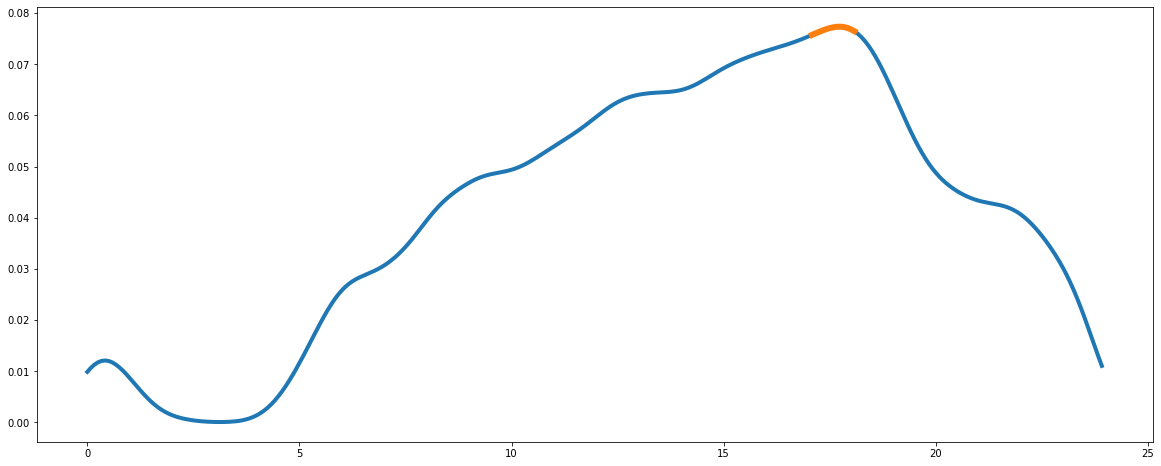

In [138]:
plt.plot(values2135we[:], probs2135we, linewidth=4)
plt.plot(values2135we[205:218], probs2135we[205:218], linewidth=6)
plt.rcParams["figure.figsize"] = (20, 8)
plt.show()

## Conclusion: